In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
df = pd.read_csv("/gdrive/My Drive/adam smith 9-12-2020 - Sheet1.csv")

In [5]:
df.head()

author  ...  year
0  Matt Kilcoyne  ...  2020
1   Madsen Pirie  ...  2020
2       Dr Smith  ...  2020
3   Lance Forman  ...  2020
4  Eamonn Butler  ...  2020

[5 rows x 6 columns]

In [6]:
df.shape

(123, 6)

In [7]:
df1 = pd.read_csv("/gdrive/My Drive/iea_2020.csv")

In [8]:
df1.shape

(141, 7)

In [9]:
df2 = pd.read_csv("/gdrive/My Drive/cato_2020.csv")

In [10]:
df2.shape

(111, 7)

In [11]:
df3 = pd.read_csv("/gdrive/My Drive/the_heritage_2020.csv")

In [12]:
df3.shape

(410, 7)

In [13]:
Neoliber = pd.concat([df, df1, df2, df3])

In [14]:
Neoliber

author  ... Unnamed: 0
0      Matt Kilcoyne  ...        NaN
1       Madsen Pirie  ...        NaN
2           Dr Smith  ...        NaN
3       Lance Forman  ...        NaN
4      Eamonn Butler  ...        NaN
..               ...  ...        ...
405  Andrew  McIndoe  ...      452.0
406    Tommy  Binion  ...      453.0
407     Kay C. James  ...      454.0
408  Kevin  Pham, MD  ...      455.0
409  Kevin  Pham, MD  ...      456.0

[785 rows x 7 columns]

In [15]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

Neoliber = Neoliber.drop('Unnamed: 0', axis = 1)

In [16]:
Neoliber.head()

author  ...  year
0  Matt Kilcoyne  ...  2020
1   Madsen Pirie  ...  2020
2       Dr Smith  ...  2020
3   Lance Forman  ...  2020
4  Eamonn Butler  ...  2020

[5 rows x 6 columns]

In [17]:
#Tsekarw gia dipla arthra 

Neoliber.drop_duplicates(subset=['title'], keep='first', inplace = True)
Neoliber.shape

(785, 6)

In [18]:
# Προσθέτω νέες στήλες στο dataframe και συγκεκριμένα το μήνα και την ημέρα

Neoliber['month'] = pd.DatetimeIndex(Neoliber['date']).month
Neoliber['day'] = pd.DatetimeIndex(Neoliber['date']).day

In [19]:
Neoliber.dtypes

author    object
body      object
date      object
title     object
url       object
year       int64
month      int64
day        int64
dtype: object

In [20]:
Neoliber.head()

author                                               body  ... month day
0  Matt Kilcoyne  With the release of the details of the make-up...  ...     5   4
1   Madsen Pirie  Cost-benefit analysis is a useful tool for wor...  ...     5  10
2       Dr Smith  I have been asked how medicine is practised di...  ...     4  29
3   Lance Forman  The Government is going about supporting the e...  ...     3  19
4  Eamonn Butler  Too late now, but I think I understand why min...  ...     4  27

[5 rows x 8 columns]

In [21]:
# Βρίσκω πόσα άρθρα εντοπίζονται ανά μήνα

Neoliber['month'].value_counts()

4     149
5     116
3     100
6      77
7      74
8      67
9      64
10     44
11     34
1      26
2      24
12     10
Name: month, dtype: int64

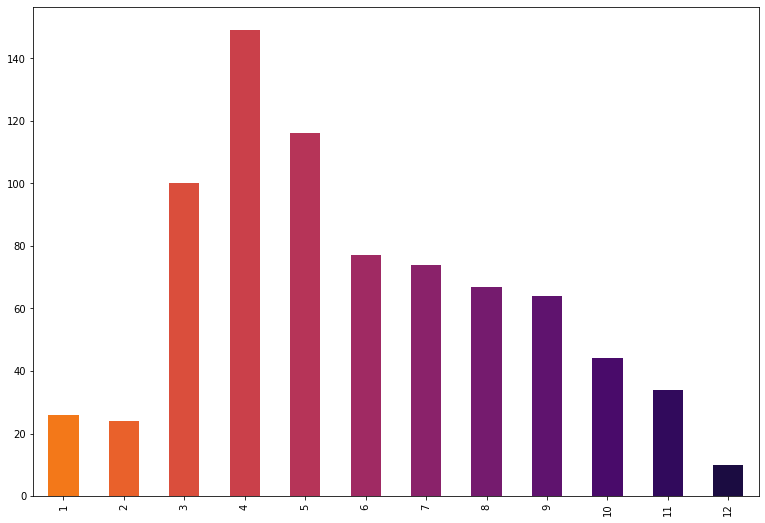

In [22]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4, 70))
color

Neoliber['month'].value_counts(sort=False).plot(kind='bar', color=color, legend=False, figsize=(13, 9))

In [23]:
# Καθαρίζω το dataframe από URLs - regular expressions

Neoliber['body'] = Neoliber['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\n', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\r', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\\n', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\\r', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\n\r\n', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\r\n\r\n', " ", regex=True)

Neoliber['body'] = Neoliber['body'].str.replace(r'\xa0', " ", regex=True)

In [24]:
body = Neoliber['body'].str.cat(sep = ' ').replace("amp", ' ')

In [25]:
body

'With the release of the details of the make-up of the groups advising the government over the lockdown, it is now clear there is a sincere lack of economic expertise as our financial future teeters on the brink. The Adam Smith Institute’s Matt Kilcoyne calls on the government to engage now with economists:    “SAGE includes epidemiologists, psychologists, statisticians, environmental and adolescent scientists, sociologists, and hygiene experts. It does not, however, include a single macro or micro-economist.    “The lockdown is having a huge impact on our lives and livelihoods. Our wellbeing is intrinsically linked to our economic prosperity. Millions of jobs are on the line. Thousands of businesses are on the verge of collapse.    “It is essential that Government policy is based on a wide array of perspectives — but to exclude mainstream economics is a blindspot of exceptional proportions. It leaves gaps in ideas and solutions at a time when we cannot afford any mistakes to be made.”

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

All frequencies, without STOPWORDS:
            Frequency
Word                 
government       1386
people           1379
COVID-19         1259
U.S.             1107
health            993
many              945
China             936
public            919
economic          908
time              883
pandemic          853
state             829
work              716
make              660
week              653
year              644
care              644
need              641
world             639
like              623


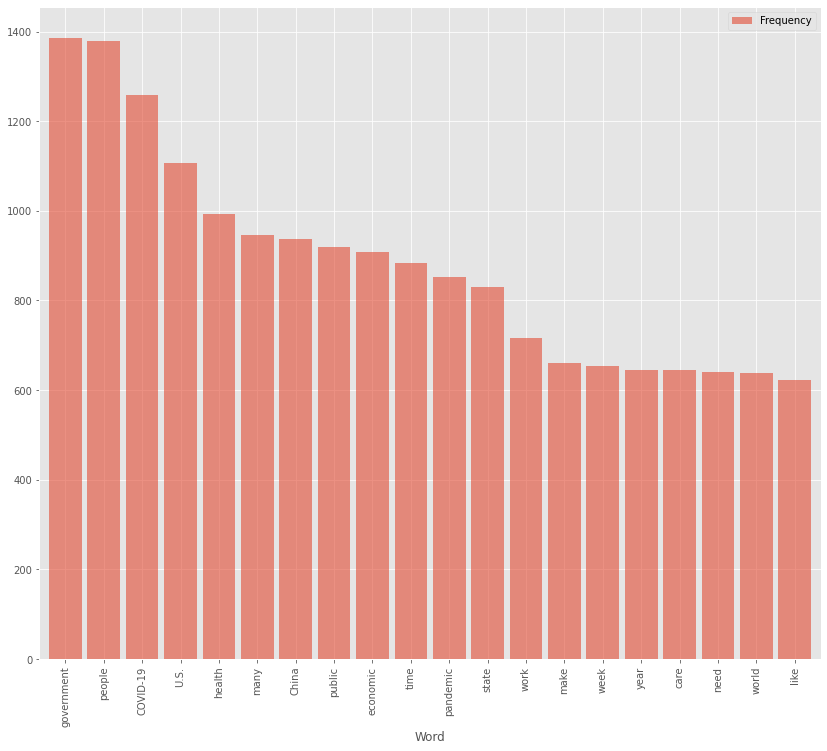

In [27]:
#Κάνω import την βιβλιοθήκη nltk και δημιουργώ διάγραμμα με την συχνότητα που εμφανίζονται λέξεις στα κείμενα

from nltk.corpus import stopwords

top_words = 20

words = nltk.tokenize.word_tokenize(body)
words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['from', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'])
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 


print('All frequencies, without STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_words), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

plt.style.use('ggplot')

rslt.plot.bar(width=0.85, alpha=0.6, figsize=(14,12))

In [28]:
# more cleaning

import string
def clean_text(body):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", body.lower())
    return re.sub(r'\W+', ' ', clean1)

In [29]:
body =  Neoliber['body'].str.cat(sep = ' ').replace("amp", ' ')

In [30]:
body

'With the release of the details of the make-up of the groups advising the government over the lockdown, it is now clear there is a sincere lack of economic expertise as our financial future teeters on the brink. The Adam Smith Institute’s Matt Kilcoyne calls on the government to engage now with economists:    “SAGE includes epidemiologists, psychologists, statisticians, environmental and adolescent scientists, sociologists, and hygiene experts. It does not, however, include a single macro or micro-economist.    “The lockdown is having a huge impact on our lives and livelihoods. Our wellbeing is intrinsically linked to our economic prosperity. Millions of jobs are on the line. Thousands of businesses are on the verge of collapse.    “It is essential that Government policy is based on a wide array of perspectives — but to exclude mainstream economics is a blindspot of exceptional proportions. It leaves gaps in ideas and solutions at a time when we cannot afford any mistakes to be made.”

In [31]:
import spacy

In [32]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
nlp = spacy.load('en_core_web_sm')

In [34]:
list(nlp.Defaults.stop_words)[0:20]

['though',
 'during',
 'seeming',
 'already',
 'beyond',
 'a',
 'their',
 'nor',
 'became',
 'ourselves',
 'its',
 'whatever',
 'n’t',
 'to',
 'besides',
 'because',
 'everyone',
 'become',
 'us',
 'her']

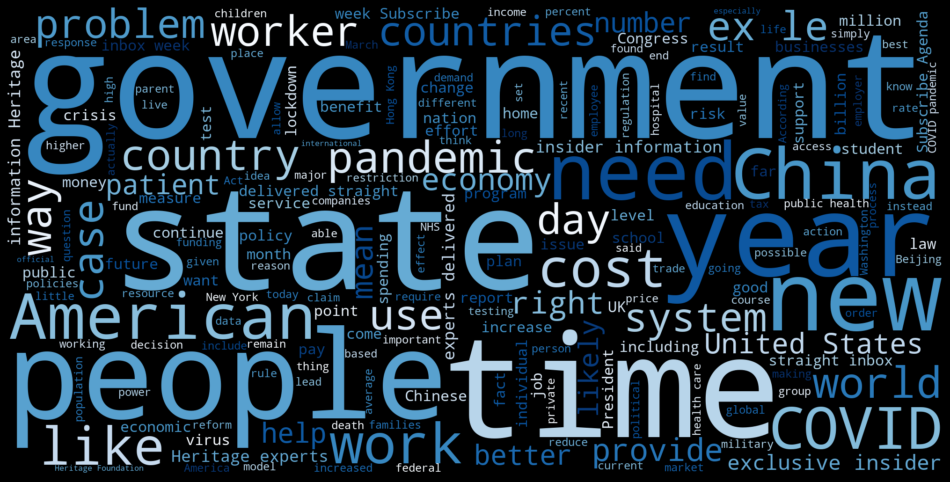

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap = "Blues"
 ).generate(body)
fig = plt.figure(
    figsize = (13, 13),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
# Ξεκινώ τη διανυσματοποίηση 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [37]:
count_vector = cv.fit_transform(Neoliber['body'])

In [38]:
count_vector.shape

(785, 23485)

In [39]:
# Ο αριθμός "16754" αναφέρεται στο σύνολο των λέξεων που περιέχονται στα κείμενα

In [40]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  001  002  0051  01  ...  zulu  zuluaga  zürcher  ça  élément  íñigo
0   0    0    0    0     0   0  ...     0        0        0   0        0      0
1   0    0    0    0     0   0  ...     0        0        0   0        0      0
2   1    0    0    0     0   0  ...     0        0        0   0        0      0
3   0    0    0    0     0   0  ...     0        0        0   0        0      0
4   0    0    0    0     0   0  ...     0        0        0   0        0      0

[5 rows x 23485 columns]

In [41]:
# cv.vocabulary_

In [42]:
# Θέτω κάποιες παραμέτρους, έτσι ώστε να μην εμφανίζονται λέξεις που είναι αρκετά συχνές αλλά ούτε και αρκετά σπάνιες

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [43]:
count_vector = cv.fit_transform(Neoliber['body'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [44]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  100  101  11  12  ...  young  younger  zealand  zero  zone  zu
0    0   0    0    0   0   0  ...      0        0        0     0     0   0
1    0   0    0    0   0   0  ...      0        0        0     0     0   0
2    0   0    0    0   0   0  ...      0        0        0     0     0   0
3    0   0    0    0   0   0  ...      0        0        0     0     0   0
4    0   0    0    0   0   0  ...      0        0        0     0     0   0

[5 rows x 5221 columns]

In [45]:
# Φτιάχνω τον δικό μου tokenizer, έτσι ώστε για κάθε "token" να βρίσκει το "token.lemma", δηλαδή να εμφανίζει τη βάση της λέξης, το λήμμα της

from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [46]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Neoliber['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  zealand  zero  zone  ”get  ≈msc
0    3     0      0       0        0  ...        0     0     0     0     0
1    3     4      0       0        0  ...        0     0     0     0     0
2    9     1      0       0        0  ...        0     0     0     0     0
3    5     0      0       0        0  ...        0     0     0     0     0
4    5     3      0       0        0  ...        0     0     0     0     0

[5 rows x 4015 columns]

In [47]:
# Χρησιμοποιώ την παράμετρο "max_features" για να μου βρει τις 20 πιο συχνές λέξεις που υπάρχουν στους τίτλους
 
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Neoliber['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


19  care  china  coronavirus  covid  ...  states  time  work  world  year
0   0     0      0            0      0  ...       0     1     0      0     0
1   0     0      0            0      0  ...       0     3     0      0     1
2   0     3      0            0      1  ...       0     1     0      0     0
3   0     0      0            1      1  ...       0     0     0      0     0
4   0     0      0            0      0  ...       0     0     0      0     0

[5 rows x 20 columns]

In [48]:
# Χρησιμοποιώ το ngram για να μου βρει ζευγάρια λέξεων και συγκεκριμένα τα 20 πιο συχνά ζευγάρια λέξεων που εντοπίζει στα κείμενα

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Neoliber['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


19 pandemic  covid 19  ...  united states  week subscribe
0            0         0  ...              0               0
1            0         0  ...              0               0
2            0         0  ...              0               0
3            0         0  ...              0               0
4            0         0  ...              0               0

[5 rows x 20 columns]

In [49]:
results.sum(axis =0).sort_values(ascending = False)

covid 19                1461
united states            442
week subscribe           399
information heritage     399
delivered straight       399
exclusive insider        399
experts delivered        399
heritage experts         399
inbox week               399
insider information      399
straight inbox           399
subscribe agenda         399
public health            291
new york                 241
hong kong                206
health care              190
heritage foundation      188
19 pandemic              184
postal service           154
private sector           144
dtype: int64

In [50]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

covid 19                1461
united states            442
week subscribe           399
information heritage     399
delivered straight       399
dtype: int64

In [51]:
# Χρησιμοποιώ το token_pattern για να μου βρει λέξεις σχετικές με το covid-19

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Neoliber['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

cov  cov-2  cov2  ...  covid-positive  covid-related  covid19
0    0      0     0  ...               0              0        0
1    0      0     0  ...               0              0        0
2    0      0     0  ...               0              0        0
3    0      0     0  ...               0              0        1
4    0      0     0  ...               0              0        0

[5 rows x 20 columns]

In [52]:
results.sum(axis =0).sort_values(ascending = False)

covid-19            1433
covid                207
coverage              83
cover                 77
covers                27
covered               25
covering              23
cov-2                 19
covid-19-related      16
covid19                9
covid-related          7
cov2                   5
cover-up               2
covenant               2
coverings              2
covid-positive         2
covertly               1
covid-like             1
covid-only             1
cov                    1
dtype: int64

In [53]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'government']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Neoliber['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


covid19  government
0        0           3
1        0           0
2        0           0
3        1           7
4        0           0

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Βαρύτητα λέξης

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Neoliber['body'])  #finds the tfidf score with normalization

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [56]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10  100   12   15  ...  worse    worth      year     years  york
0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.00000  0.000000  0.000000   0.0
1  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.07513  0.045021  0.044099   0.0
2  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.00000  0.000000  0.000000   0.0
3  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.00000  0.000000  0.000000   0.0
4  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.00000  0.000000  0.082577   0.0

[5 rows x 500 columns]

In [57]:
# Με τη βοήθεια της συνάρτησης cosine_similarity() εντοπίζω την ομοιότητα που υπάρχει στους τίτλους

from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.01159101 0.01769325 0.17036591 0.07649783 0.15252925
  0.11161554 0.13651754 0.04888011 0.09193679 0.06373571 0.01901248
  0.03155007 0.04724583 0.03151028 0.05706445 0.15970274 0.03947365
  0.03242518 0.18078386 0.         0.28820512 0.04166724 0.02464312
  0.03294919 0.04989737 0.15250046 0.14457756 0.1893877  0.01763499
  0.20150626 0.09489716 0.02846087 0.15821503 0.19246476 0.08434713
  0.02265888 0.36263114 0.04128197 0.07866013 0.05188169 0.19885038
  0.06558072 0.03506445 0.         0.06786688 0.12076674 0.256996
  0.         0.22388941 0.0371684  0.10708421 0.23140892 0.07851521
  0.04209324 0.20302012 0.05883828 0.         0.20999158 0.01389725
  0.12029161 0.02022108 0.20038195 0.03563731 0.17232391 0.03397897
  0.03611369 0.06318588 0.02292878 0.08251849 0.0899822  0.05690298
  0.18657693 0.0727952  0.1165133  0.07615865 0.03038003 0.01913553
  0.06487267 0.09495426 0.06998833 0.09901044 0.08450112 0.00581691
  0.08160417 0.01333109 0.09470

In [58]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.01159101 0.01769325 ... 0.08819723 0.04435811 0.03736403]
 [0.01159101 1.         0.05984125 ... 0.12851281 0.05697536 0.09952394]
 [0.01769325 0.05984125 1.         ... 0.16085303 0.26345789 0.05345165]
 ...
 [0.08819723 0.12851281 0.16085303 ... 1.         0.2953241  0.16314507]
 [0.04435811 0.05697536 0.26345789 ... 0.2953241  1.         0.16026545]
 [0.03736403 0.09952394 0.05345165 ... 0.16314507 0.16026545 1.        ]]


In [59]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

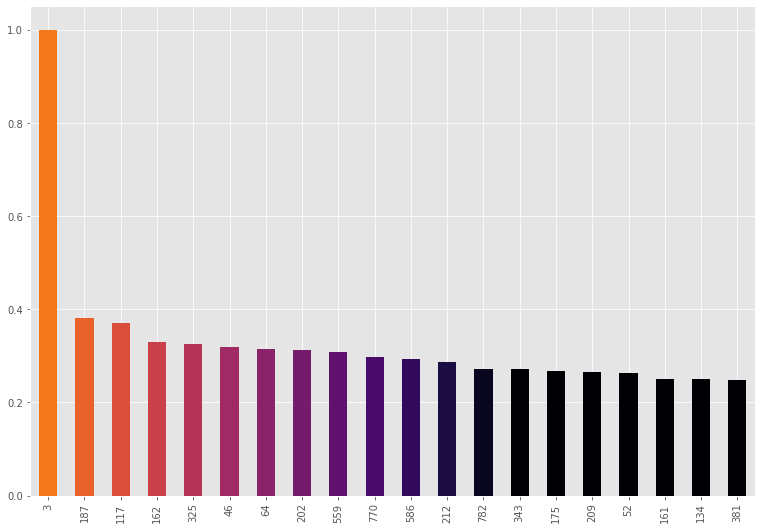

In [60]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4, 70))
color

pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', color=color, legend=False, figsize=(13, 9))

In [61]:
Neoliber['body'].iloc[3]

'The Government is going about supporting the economy in the wrong way.  A hodgepodge of support on business rates for some businesses, and supporting some staff on mortgages and maybe rent if they get laid off is confusing and not thought through. The administration of this is also a nightmare.    The key problem for the economy is that businesses have been interrupted and will remain so for a period of months, indeterminable at this stage.  There is no way most businesses in the hospitality or leisure sector can take advantage of the loan offered by Rishi Sunak as they are not in a position to make a profit for a number of months at least to be able to pay back the loan at a later date.  It makes more sense for them to liquidate the business, sack all their staff and not pay their suppliers, or indeed the taxman who is often the largest creditor.  Such a response will set off a domino chain which could be devastating for the economy.  We know from our own experience that this is what

In [62]:
Neoliber['body'].iloc[187]

'Economists have always had a soft spot for Henry George, the 19th century American author of Progress and Poverty, who argued for what we now call a ‘single tax’ on land value.   They recognise that the income accruing to owners of land – rent – is a scarcity payment which does not correspond to payment for effort. It can in principle be taxed without distorting economic activity – unlike, say, income. High marginal rates of income tax can discourage people from working and lead to less output being produced. By contrast, a tax which focuses on rental value reduces the income of landowners but does not deter production. ‘Single taxers’ tend to argue that a land value tax (LVT) could replace all other taxes.   The Liberal Democrats don’t go this far, but they have argued it could replace business rates. There is some sense in this. OK, shops, offices, bars and restaurants do impose some costs on the rest of us which ought to be reflected in the prices of their goods and services. Colle

In [63]:
# Βαρύτητα λέξης

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Neoliber['title'])  #finds the tfidf score with normalization

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [64]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10   19   1b   20  2020  ...     wrong  year  years  yes  york  zero
0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.000000   0.0    0.0  0.0   0.0   0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.000000   0.0    0.0  0.0   0.0   0.0
2  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.000000   0.0    0.0  0.0   0.0   0.0
3  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.000000   0.0    0.0  0.0   0.0   0.0
4  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.373548   0.0    0.0  0.0   0.0   0.0

[5 rows x 500 columns]

In [65]:
# Με τη βοήθεια της συνάρτησης cosine_similarity() εντοπίζω την ομοιότητα που υπάρχει στους τίτλους

from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.26072072 0.         0.41412506 0.19631201 0.
  0.26150257 0.         0.         0.34054435 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.28021692 0.         0.
  0.         0.37276205 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.13813041 0.
  0.         0.21128698 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.      

In [66]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.26072072 0.         ... 0.         0.         0.        ]
 [0.26072072 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.31759406 0.20955979 0.27620444]
 ...
 [0.         0.         0.31759406 ... 1.         0.13571393 0.17887396]
 [0.         0.         0.20955979 ... 0.13571393 1.         0.11802736]
 [0.         0.         0.27620444 ... 0.17887396 0.11802736 1.        ]]


In [67]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

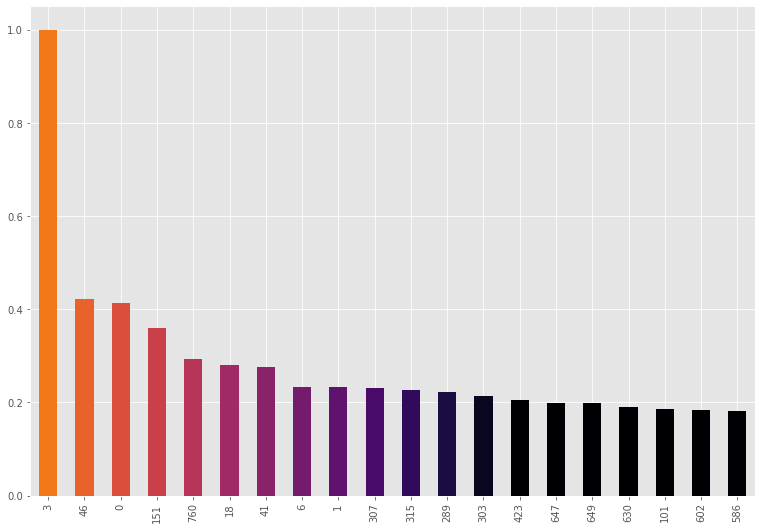

In [68]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4, 70))
color

pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', color=color, legend=False, figsize=(13, 9))

In [69]:
Neoliber['title'].iloc[3]

'COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AND KEEP THE ECONOMY ON TRACK'

In [70]:
Neoliber['title'].iloc[46]

'BUSINESS ANGELS TO THE RESCUE'

In [71]:
Neoliber['title'].iloc[0]

'WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHERS UNDER COVID19 LOCKDOWN?'

In [72]:
Neoliber['title'].iloc[151]

'Liberalising planning rules would help the economy adjust to changing business patterns — Institute of Economic Affairs'

In [73]:
Neoliber.to_csv('Neoliber_2020.csv') 
from google.colab import files
files.download("Neoliber_2020.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>